Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.linear_model import LinearRegression  # For Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluation metrics
from sklearn.preprocessing import StandardScaler  # For scaling the data (if needed)

# Setting the visualization style
sns.set(style="whitegrid")


Loading the Data


In [2]:
# Load the dataset
file_path = r'C:\Users\user\OneDrive\Desktop\umrais\CodeAlpha\Sales Prediction using Python\Advertising.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
sales_data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Understanding the Data

In [5]:
# Checking the structure and types of the data
sales_data.info()

# Statistical summary of the dataset
sales_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
# Checking for missing values
sales_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

##### The dataset contains numerical values, and there are no missing values, so we can proceed with preprocessing. The statistical summary shows the range and distribution of values, which helps in understanding the data before scaling or modeling.

Data Preprocessing

In [8]:
# Let's also scale the numerical data (if needed) for better performance in some models
scaler = StandardScaler()
numerical_columns = sales_data.select_dtypes(include=[np.number]).columns

# Applying scaling to the numerical columns
sales_data[numerical_columns] = scaler.fit_transform(sales_data[numerical_columns])

# Display the cleaned and scaled data
sales_data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,-1.723412,0.969852,0.981522,1.778945,1.552053
1,-1.706091,-1.197376,1.082808,0.669579,-0.696046
2,-1.688771,-1.516155,1.528463,1.783549,-0.907406
3,-1.671450,0.052050,1.217855,1.286405,0.860330
4,-1.654129,0.394182,-0.841614,1.281802,-0.215683


##### The data is clean, with no missing values. Scaling the numerical features ensures that all variables are on the same scale, which can help improve the performance of models that are sensitive to the magnitude of data, such as linear regression.

Exploratory Data Analysis (EDA)

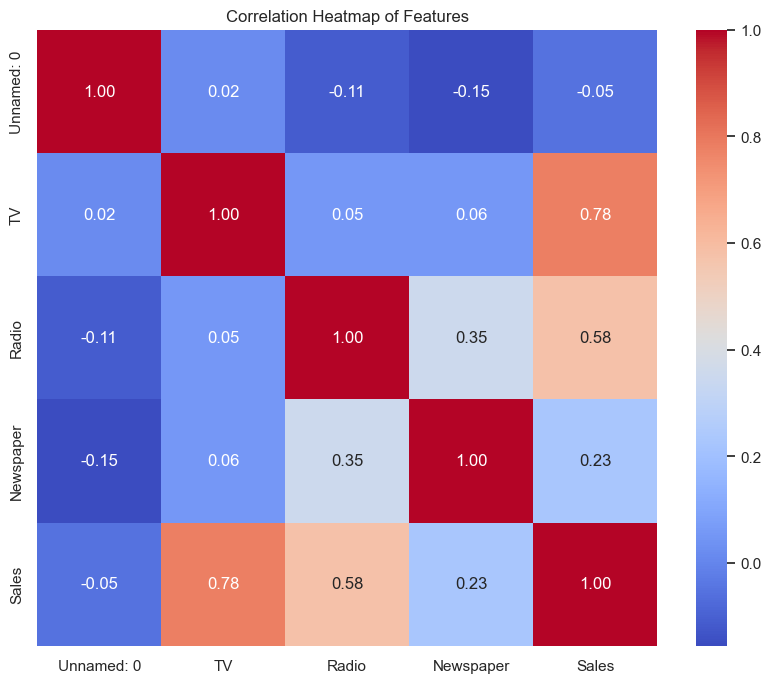

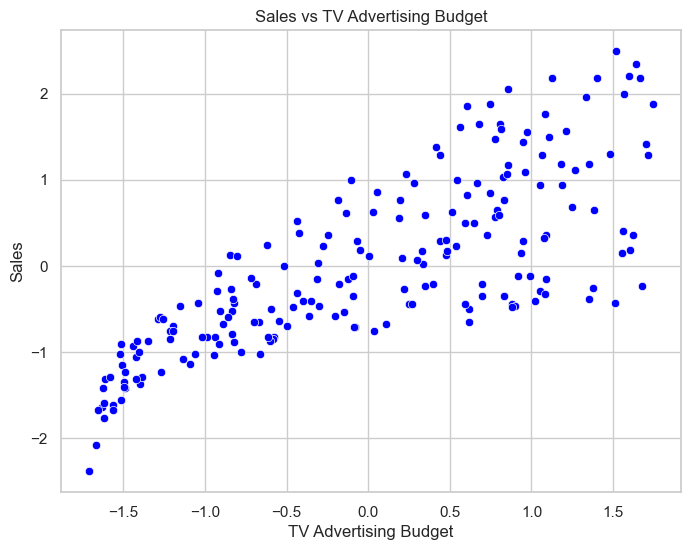

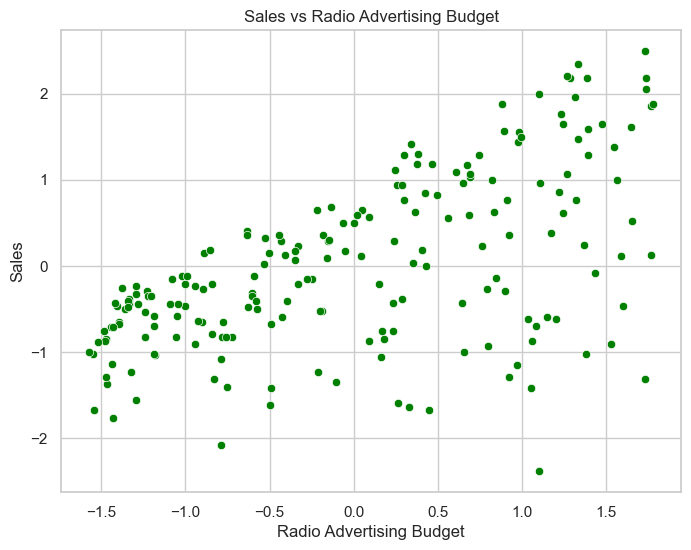

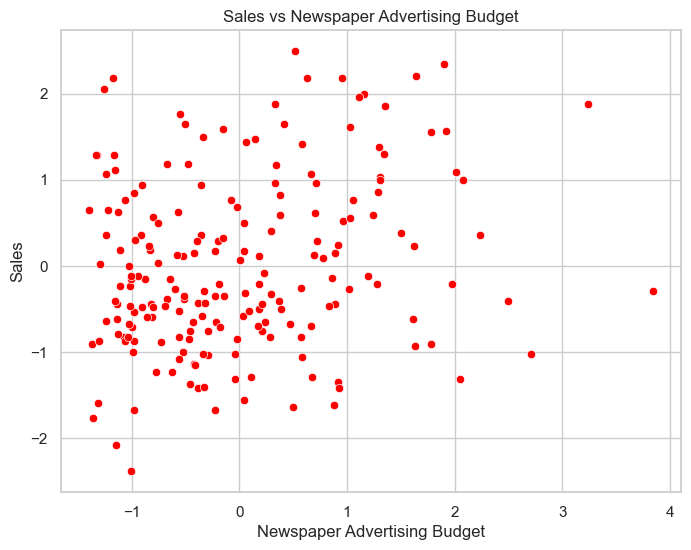

In [9]:
# Checking the correlation between the features and the target variable 'Sales'
plt.figure(figsize=(10, 8))
sns.heatmap(sales_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# Scatter plot to visualize relationship between Advertising budgets and Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sales_data['TV'], y=sales_data['Sales'], color='blue')
plt.title("Sales vs TV Advertising Budget")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=sales_data['Radio'], y=sales_data['Sales'], color='green')
plt.title("Sales vs Radio Advertising Budget")
plt.xlabel("Radio Advertising Budget")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=sales_data['Newspaper'], y=sales_data['Sales'], color='red')
plt.title("Sales vs Newspaper Advertising Budget")
plt.xlabel("Newspaper Advertising Budget")
plt.ylabel("Sales")
plt.show()


##### The correlation heatmap highlights that TV and Radio have the strongest correlation with Sales, suggesting that advertising on these platforms has the most significant impact on sales. The scatter plots reinforce this by showing a visible trend between spending on TV, Radio, and sales.

Splitting the Data into Training and Testing Sets

In [10]:
# Defining features (X) and target variable (y)
X = sales_data.drop("Sales", axis=1)
y = sales_data["Sales"]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the size of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((160, 4), (40, 4), (160,), (40,))

##### The data is split into 80% for training and 20% for testing. This ensures that the model can be trained on a larger portion of the data while leaving enough data for testing its performance and generalization.

Model Training - Linear Regression

In [11]:
# Creating the Linear Regression model
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_model.predict(X_test)


##### The Linear Regression model is trained on the available features (TV, Radio, Newspaper budgets) to predict sales. This simple model provides a baseline for evaluating how advertising spending impacts sales.

Model Evaluation

In [12]:
# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.281504317131142
Mean Squared Error (MSE): 0.11810657658565873
R-squared (R²): 0.8986489151417081


##### The model seems to perform well with a high R² score and relatively low MAE and MSE values, indicating good predictive power.


Visualizing the Predicted vs Actual Sales

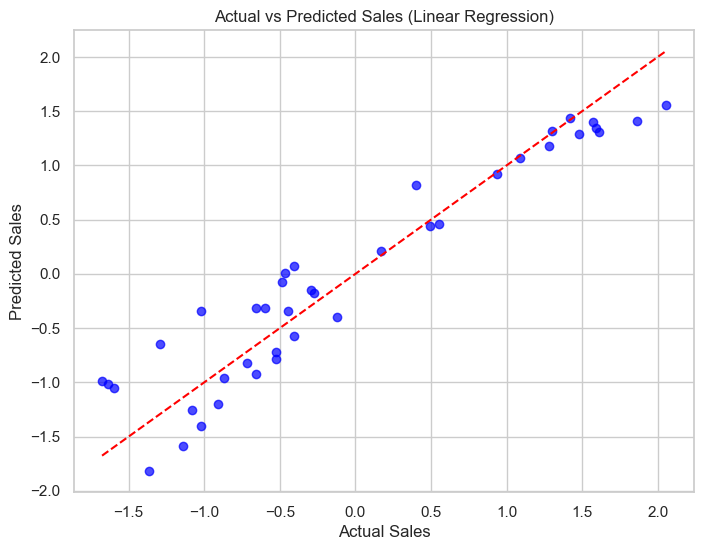

In [13]:
# Plotting Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.show()


In [15]:
# Assuming Random Forest model is already defined as rf_model

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color="blue", label="Predicted vs Actual", alpha=0.7)

# Adding a red line representing perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction Line")

# Title and labels
plt.title("Predicted vs Actual Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")

# Display the plot with legend
plt.legend()
plt.show()


NameError: name 'rf_model' is not defined